The goal here is to look at the overlap between 4MOST footprint and depth/ebv-limited extragalactic (EG) footprint for each cadence.

We calculate the overlap as a percentage since we dont have the 4MOST footprint at the HEALPix resolution of the EG footprints. The 4MOST pixels that we have are only for the centers of the instrument's FOV, so we make the footprint contiguous by making our HEALPix map coarser. We do the same for our EG footprint and see how much of 4MOST footprint is covered by our EG footprint.

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import os
import pylab
import healpy as hp
import numpy as np
import pandas as pd

In [2]:
fontsize = 16
pylab.rcParams['figure.figsize'] = (10, 6)
pylab.rcParams['axes.labelsize'] = fontsize
pylab.rcParams['xtick.labelsize'] = fontsize-2
pylab.rcParams['ytick.labelsize'] = fontsize-2
pylab.rcParams['legend.fontsize'] = fontsize
pylab.rcParams['axes.linewidth'] = 2

**Set up some things**

In [3]:
nside_4most_initial = 256
nest = True # the pixels are for nested order
order = 'NESTED'
filepath = '/global/homes/a/awan/LSST/lsstRepos/ObsStrat/static/depth_cuts/overlaps/4MOST_healpix.csv'

nside_4most = 2**4  # based on 4MOST_footprint.ipynb

nside = 256
data_dir = '/global/homes/a/awan/desc/depth_data_outputs/'
outDir = '/global/homes/a/awan/desc/depth_data_outputs/comparisons/'
yrs = ['1yr', '3yr', '6yr', '10yr']

# set up for plots
colors = ['m', 'b', 'g', 'k']
shapes = ['o', 'v', 's', 'd']

**First lets try creating the mollview map -- don't need to convert the HEALPix numbers to ra, dec.**

See more in 4MOST_footprint.ipynb

Reading in /global/homes/a/awan/LSST/lsstRepos/ObsStrat/static/depth_cuts/overlaps/4MOST_healpix.csv
Changing Nside 256 to Nside 16


/global/common/software/lsst/cori-haswell-gcc/stack/w.2018.26_sim2.9.0/stack/miniconda3-4.3.21-10a4fa6/Linux64/healpy/1.10.3.lsst1+6/lib/python/healpy-1.10.3-py3.6-linux-x86_64.egg/healpy/pixelfunc.py:304: RuntimeWarning: invalid value encountered in less_equal
  return np.absolute(m - badval) <= atol + rtol * np.absolute(badval)
/global/common/software/lsst/common/miniconda/py3-4.3.21-env/lib/python3.6/site-packages/numpy/ma/core.py:2344: RuntimeWarning: invalid value encountered in less_equal
  mabs(xnew - value), atol + rtol * mabs(value))
/global/common/software/lsst/cori-haswell-gcc/stack/w.2018.26_sim2.9.0/stack/miniconda3-4.3.21-10a4fa6/Linux64/healpy/1.10.3.lsst1+6/lib/python/healpy-1.10.3-py3.6-linux-x86_64.egg/healpy/projaxes.py:1049: RuntimeWarning: invalid value encountered in less
  result.data[result.data<0]=0.0
/global/common/software/lsst/cori-haswell-gcc/stack/w.2018.26_sim2.9.0/stack/miniconda3-4.3.21-10a4fa6/Linux64/healpy/1.10.3.lsst1+6/lib/python/healpy-1.10.3-py3.

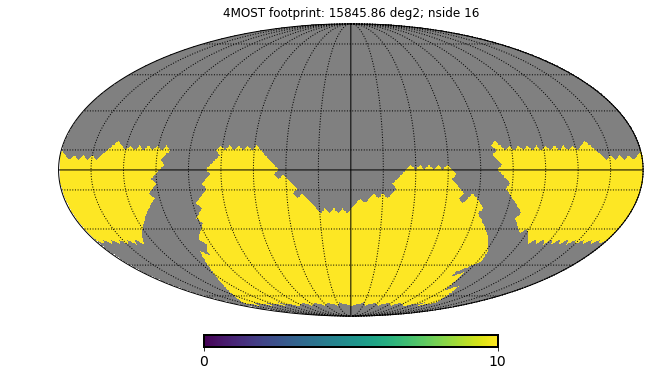

In [4]:
print('Reading in %s'%filepath)
data = pd.read_csv(filepath)
# extract the pixel numbers
hp_pix = [int(f) for f in data['# hid']]

###############################################################################################
# convert to ring right here since our footprints use ring ordering
hp_pix = hp.nest2ring(ipix=hp_pix, nside=nside_4most_initial)

nest = False
order = 'RING'
###############################################################################################
# set up the skymaps
nPix = hp.nside2npix(nside_4most_initial)
vals = np.zeros(nPix)+1.  # initiate all data to 1
vals[hp_pix] = 5000   # add fake data to the pixels in our list
# degrade the skymap see continuous footprint
print('Changing Nside %s to Nside %s'%(nside_4most_initial, nside_4most))
vals = hp.ud_grade(vals, nside_out=nside_4most, order_in=order, order_out=order)

# okay create a mask out of the nside
four_most_footprint = vals.view(np.ma.MaskedArray)
four_most_footprint.mask = [True]*nPix
four_most_footprint.fill_value = np.nan
four_most_footprint.mask[vals>10] = False

plt.clf()
hp.mollview(four_most_footprint, flip='astro', rot=(0,0,0), min=0, max=10, nest=nest,
            title='4MOST footprint: %.2f deg2; nside %s'%(len(np.where(vals>10)[0])*hp.nside2pixarea(nside=nside_4most,
                                                                                                     degrees=True), nside_4most)
           )
hp.graticule(dpar=20, dmer=20, verbose=False)
plt.show()

**Okay lets read in the EG footprint for each cadence and look at the overlap with 4MOST (nside 16 version)**

Reading in eg_footprint_kraken_2036_1yr_nside256_HEALPixels.csv


/global/common/software/lsst/cori-haswell-gcc/stack/w.2018.26_sim2.9.0/stack/miniconda3-4.3.21-10a4fa6/Linux64/healpy/1.10.3.lsst1+6/lib/python/healpy-1.10.3-py3.6-linux-x86_64.egg/healpy/pixelfunc.py:304: RuntimeWarning: invalid value encountered in less_equal
  return np.absolute(m - badval) <= atol + rtol * np.absolute(badval)
/global/common/software/lsst/common/miniconda/py3-4.3.21-env/lib/python3.6/site-packages/numpy/ma/core.py:2344: RuntimeWarning: invalid value encountered in less_equal
  mabs(xnew - value), atol + rtol * mabs(value))
/global/common/software/lsst/cori-haswell-gcc/stack/w.2018.26_sim2.9.0/stack/miniconda3-4.3.21-10a4fa6/Linux64/healpy/1.10.3.lsst1+6/lib/python/healpy-1.10.3-py3.6-linux-x86_64.egg/healpy/projaxes.py:1049: RuntimeWarning: invalid value encountered in less
  result.data[result.data<0]=0.0
/global/common/software/lsst/cori-haswell-gcc/stack/w.2018.26_sim2.9.0/stack/miniconda3-4.3.21-10a4fa6/Linux64/healpy/1.10.3.lsst1+6/lib/python/healpy-1.10.3-py3.

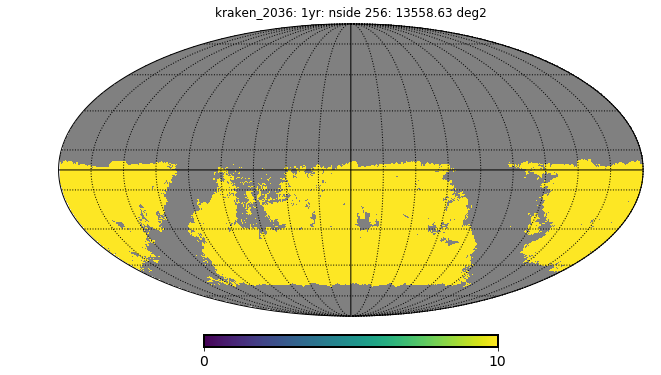

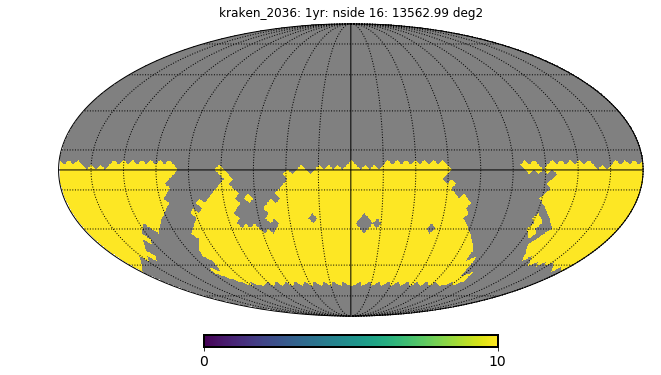

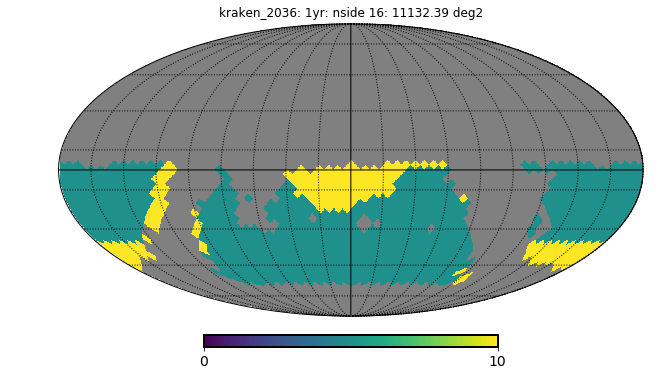

## fmost_area: 15845.86 deg2

Reading in eg_footprint_nexus_2097_1yr_nside256_HEALPixels.csv
Reading in eg_footprint_kraken_2035_1yr_nside256_HEALPixels.csv
Reading in eg_footprint_colossus_2667_1yr_nside256_HEALPixels.csv
Reading in eg_footprint_alt_sched_rolling_1yr_nside256_HEALPixels.csv
Reading in eg_footprint_colossus_2664_1yr_nside256_HEALPixels.csv
Reading in eg_footprint_rolling_10yrs_1yr_nside256_HEALPixels.csv
Reading in eg_footprint_kraken_2044_1yr_nside256_HEALPixels.csv
Reading in eg_footprint_baseline2018a_1yr_nside256_HEALPixels.csv
Reading in eg_footprint_pontus_2502_1yr_nside256_HEALPixels.csv
Reading in eg_footprint_cadence_roll_75_mix_rolling_mix_10yrs_1yr_nside256_HEALPixels.csv
Reading in eg_footprint_alt_sched_1yr_nside256_HEALPixels.csv
Reading in eg_footprint_pontus_2002_1yr_nside256_HEALPixels.csv
Reading in eg_footprint_roll_mix_rolling_mix_10yrs_1yr_nside256_HEALPixels.csv
Reading in eg_footprint_colossus_2665_1yr_nside256_HEALPixels.csv
Reading in eg_footpr

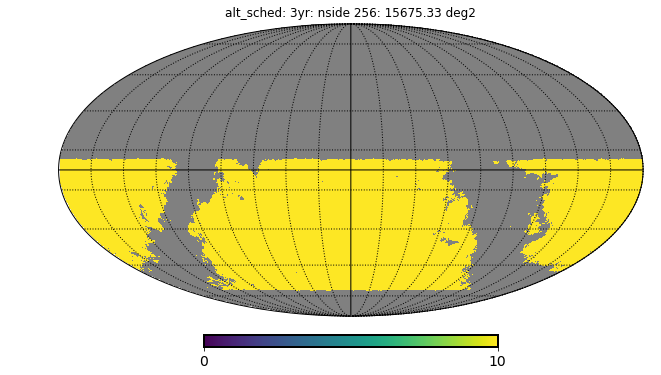

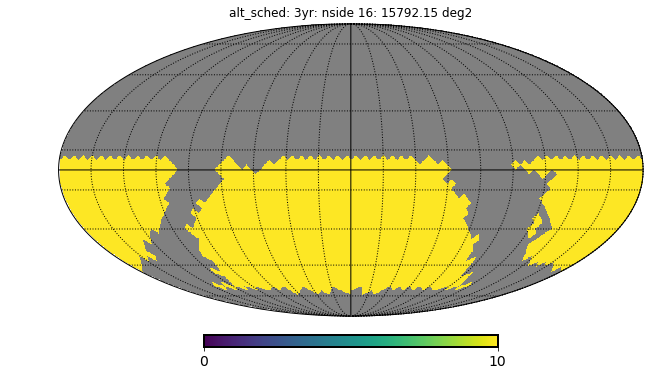

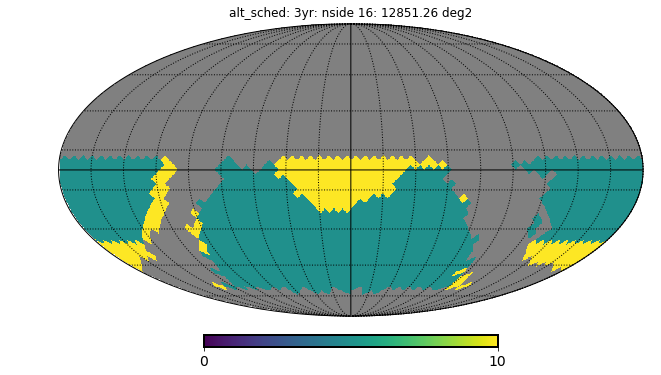

Reading in eg_footprint_kraken_2035_3yr_nside256_HEALPixels.csv
Reading in eg_footprint_pontus_2002_3yr_nside256_HEALPixels.csv
Reading in eg_footprint_pontus_2489_3yr_nside256_HEALPixels.csv
Reading in eg_footprint_roll_mix_rolling_mix_10yrs_3yr_nside256_HEALPixels.csv
Reading in eg_footprint_kraken_2044_3yr_nside256_HEALPixels.csv
Reading in eg_footprint_alt_sched_rolling_3yr_nside256_HEALPixels.csv
Reading in eg_footprint_colossus_2665_3yr_nside256_HEALPixels.csv
Reading in eg_footprint_mothra_2049_3yr_nside256_HEALPixels.csv
Reading in eg_footprint_rolling_10yrs_3yr_nside256_HEALPixels.csv
Reading in eg_footprint_mothra_2045_3yr_nside256_HEALPixels.csv
Reading in eg_footprint_kraken_2042_3yr_nside256_HEALPixels.csv
Reading in eg_footprint_baseline2018a_3yr_nside256_HEALPixels.csv
Reading in eg_footprint_nexus_2097_3yr_nside256_HEALPixels.csv
Reading in eg_footprint_pontus_2502_3yr_nside256_HEALPixels.csv
Reading in eg_footprint_kraken_2026_3yr_nside256_HEALPixels.csv
Reading in eg_

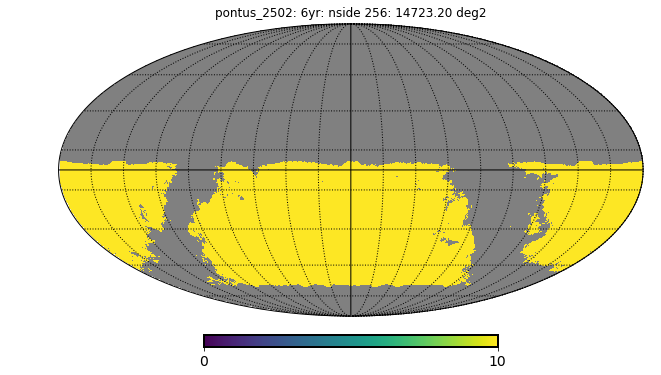

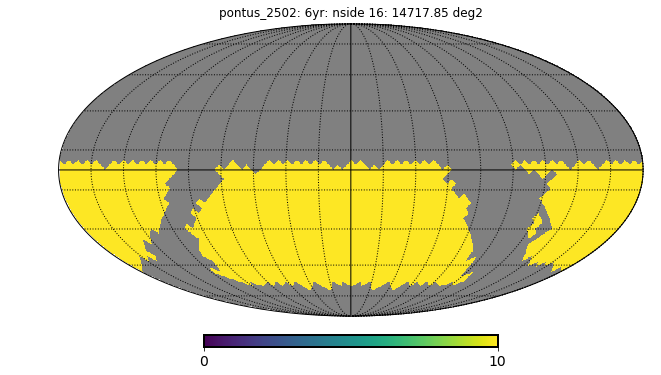

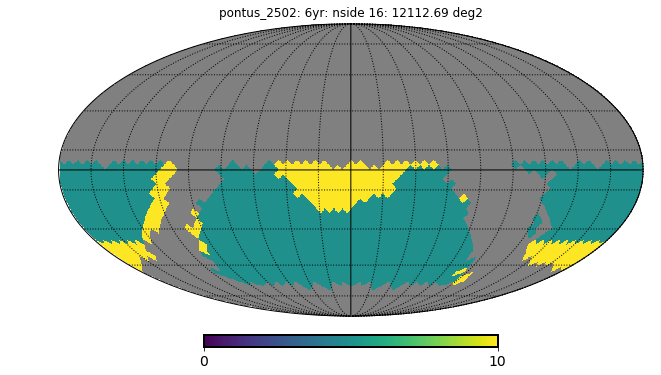

Reading in eg_footprint_kraken_2035_6yr_nside256_HEALPixels.csv
Reading in eg_footprint_alt_sched_rolling_6yr_nside256_HEALPixels.csv
Reading in eg_footprint_roll_mix_100_rolling_mix_10yrs_6yr_nside256_HEALPixels.csv
Reading in eg_footprint_rolling_10yrs_6yr_nside256_HEALPixels.csv
Reading in eg_footprint_nexus_2097_6yr_nside256_HEALPixels.csv
Reading in eg_footprint_cadence_roll_75_mix_rolling_mix_10yrs_6yr_nside256_HEALPixels.csv
Reading in eg_footprint_pontus_2489_6yr_nside256_HEALPixels.csv
Reading in eg_footprint_kraken_2042_6yr_nside256_HEALPixels.csv
Reading in eg_footprint_tms_roll_10yrs_6yr_nside256_HEALPixels.csv
Reading in eg_footprint_roll_mix_rolling_mix_10yrs_6yr_nside256_HEALPixels.csv
Reading in eg_footprint_mothra_2049_6yr_nside256_HEALPixels.csv
Reading in eg_footprint_pontus_2002_6yr_nside256_HEALPixels.csv
Reading in eg_footprint_colossus_2665_6yr_nside256_HEALPixels.csv
Reading in eg_footprint_alt_sched_6yr_nside256_HEALPixels.csv
Reading in eg_footprint_colossus_2

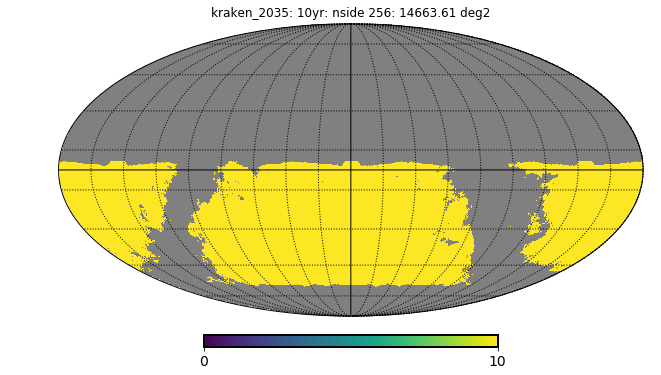

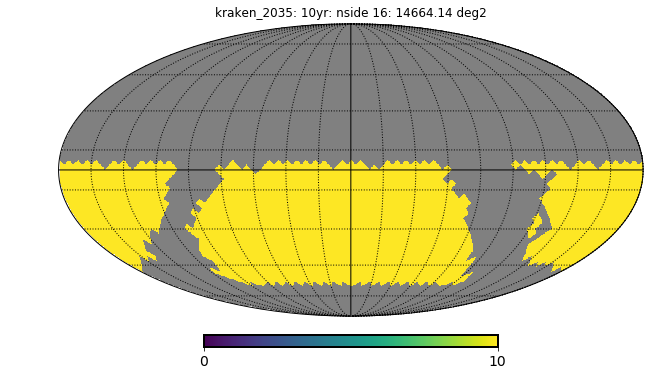

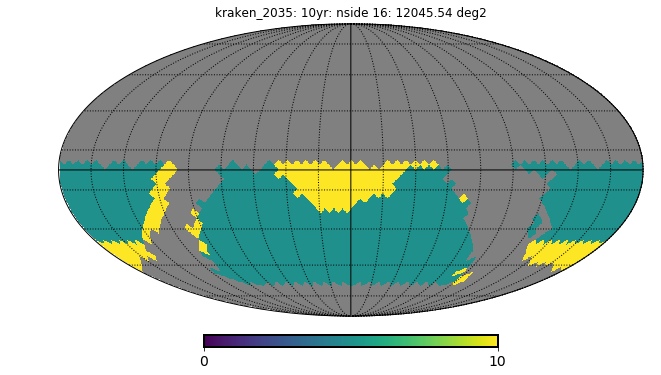

Reading in eg_footprint_colossus_2665_10yr_nside256_HEALPixels.csv
Reading in eg_footprint_alt_sched_rolling_10yr_nside256_HEALPixels.csv
Reading in eg_footprint_rolling_10yrs_10yr_nside256_HEALPixels.csv
Reading in eg_footprint_kraken_2036_10yr_nside256_HEALPixels.csv
Reading in eg_footprint_tms_roll_10yrs_10yr_nside256_HEALPixels.csv
Reading in eg_footprint_colossus_2667_10yr_nside256_HEALPixels.csv
Reading in eg_footprint_roll_mix_rolling_mix_10yrs_10yr_nside256_HEALPixels.csv
Reading in eg_footprint_mothra_2049_10yr_nside256_HEALPixels.csv
Reading in eg_footprint_nexus_2097_10yr_nside256_HEALPixels.csv
Reading in eg_footprint_baseline2018a_10yr_nside256_HEALPixels.csv
Reading in eg_footprint_pontus_2489_10yr_nside256_HEALPixels.csv
Reading in eg_footprint_alt_sched_10yr_nside256_HEALPixels.csv
Reading in eg_footprint_cadence_roll_75_mix_rolling_mix_10yrs_10yr_nside256_HEALPixels.csv
Reading in eg_footprint_roll_mix_100_rolling_mix_10yrs_10yr_nside256_HEALPixels.csv
Reading in eg_fo

In [5]:
%%time
# get all the files
all_files = [f for f in os.listdir(data_dir) if f.endswith('csv') and f.__contains__('eg_footprint')]

overlaps, tot_area, percent_4most = {}, {}, {}
for j, yr in enumerate(yrs):  # run over the different years
    # inititate the dictionaries
    if yr not in overlaps:
        overlaps[yr], tot_area[yr], percent_4most[yr] = {}, {}, {}
    # get the files for this year
    files = [f for f in all_files if f.__contains__('_%s_'%yr)]
    # loop over all the files now; one for each cadence
    for i, file in enumerate(files):
        dbname = file.split('_%s_nside'%yr)[0].split('footprint_')[-1]
        
        if dbname in overlaps[yr]:
            raise ValueError('SOMETHINGS WRONG: already have %s in %s\n'%(dbname, overlaps[yr]))
            
        # read in the data
        print('Reading in %s'%file)
        data = pd.read_csv('%s/%s'%(data_dir, file))
        # extract the pixel numbers
        hp_pix = [int(f) for f in data['pixNum']]

        # set up to plot the footprint
        nPix = hp.nside2npix(nside)
        val = np.zeros(nPix)+1000.
        footprint = val.view(np.ma.MaskedArray)
        footprint.mask = [True]*nPix
        footprint.fill_value = np.nan
        footprint.mask[hp_pix] = False
        
        if i==0:  # only plot for the first db
            plt.clf()
            hp.mollview(footprint, flip='astro',
                        title='%s: %s: nside %s: %.2f deg2'%(dbname, yr, nside, 
                                                             len(np.where(footprint.mask==False)[0])*hp.nside2pixarea(nside,
                                                                                                                      degrees=True)),
                        rot=(0,0,0), min=0, max=10)
            hp.graticule(dpar=20, dmer=20, verbose=False)
            plt.show()
        
        # now degrade to 4most_nside
        footprint.fill_value = -1000
        footprint = hp.ud_grade(footprint, nside_out=nside_4most, pess=True)
        
        footprint = footprint.view(np.ma.MaskedArray)
        footprint.mask = [True]*len(vals)
        footprint.mask[np.where(footprint.data>0)[0]] = False
        footprint.data[footprint.mask==False] = 100
        footprint.fill_value = np.nan
        # store the area
        tot_area[yr][dbname] = len(np.where(footprint.mask==False)[0])*hp.nside2pixarea(nside_4most, degrees=True)
        
        if i==0: # only plot for the first db
            plt.clf()
            hp.mollview(footprint, flip='astro',
                        title='%s: %s: nside %s: %.2f deg2'%(dbname, yr, nside_4most, 
                                                             len(np.where(footprint.mask==False)[0])*hp.nside2pixarea(nside_4most,
                                                                                                                      degrees=True)),
                        rot=(0,0,0), min=0, max=10)
            hp.graticule(dpar=20, dmer=20, verbose=False)
            plt.show()
        
        # calculate the overlap
        lsst_pix = np.where(footprint.mask==False)[0]
        fmost_pix = np.where(four_most_footprint.mask==False)[0]
        overlap = [f for f in lsst_pix if f in fmost_pix]
        
        if i==0: # only plot for the first db
            footprint.data[overlap] = 5
            plt.clf()
            hp.mollview(footprint, flip='astro',
                        title='%s: %s: nside %s: %.2f deg2'%(dbname, yr, nside_4most, 
                                                             len(overlap)*hp.nside2pixarea(nside_4most, degrees=True)),
                        rot=(0,0,0), min=0, max=10)
            hp.graticule(dpar=20, dmer=20, verbose=False)
            plt.show()
        # store the overlap
        overlaps[yr][dbname] = len(overlap)*hp.nside2pixarea(nside_4most, degrees=True)
        
        if (i+j)==0:
            # calculate 4MOST area
            fmost_area = len(fmost_pix)*hp.nside2pixarea(nside=nside_4most, degrees=True)
            print('## fmost_area: %.2f deg2\n'%fmost_area)
        # calculate the overlap percentage
        percent_4most[yr][dbname] = 100.*overlaps[yr][dbname]/fmost_area

**Compare things across different cadences**

In [6]:
# want specific ordering of the dbs so write them out
dbs = ['baseline2018a', 'kraken_2026', 'kraken_2035', 'kraken_2036', 'colossus_2665', \
          'colossus_2664', 'colossus_2667', 'pontus_2002', 'pontus_2489', 'pontus_2502', 'mothra_2045', \
       'kraken_2042', 'kraken_2044', 'mothra_2049', 'nexus_2097', 
      'cadence_roll_75_mix_rolling_mix_10yrs', 'roll_mix_100_rolling_mix_10yrs', \
            'roll_mix_rolling_mix_10yrs', \
            'rolling_10yrs', 'tms_roll_10yrs', 'alt_sched', 'alt_sched_rolling']

**Plot the overlap percetanges for different cadences**

Saved compare_4MOSTcoverage_22dbs.png


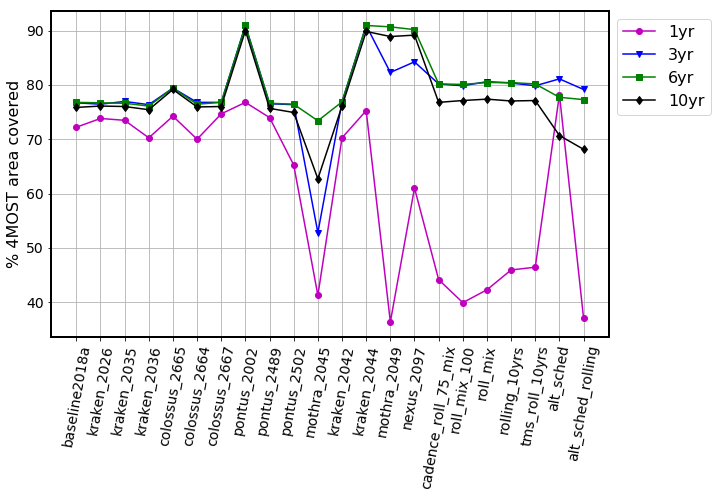

In [7]:
xlabels = []
nDbs = len(dbs)
# first need to create the lists with the data each yr_cut
plist = {}
for dbname in dbs:  # loop over dbs
    if dbname.__contains__('_rolling_mix_10yrs'):
        label = dbname.split('_rolling_mix_10yrs')[0]
    else:
        label = dbname
    xlabels.append(label)
    for yr_cut in yrs:  # loop over yr cuts
        if yr_cut not in plist: plist[yr_cut] = []
        # add this db's area
        plist[yr_cut].append(percent_4most[yr_cut][dbname])
# now plot
for i, yr_cut in enumerate(yrs):
    plt.plot(range(nDbs), plist[yr_cut], '%s-'%shapes[i], color=colors[i], label=yr_cut)
# plot details
plt.grid()
plt.legend(bbox_to_anchor=(1.,1))
plt.ylabel(r'% 4MOST area covered')
plt.xticks(range(nDbs), xlabels, rotation=80)
filename = 'compare_4MOSTcoverage_%sdbs.png'%(nDbs)
plt.savefig('%s/%s'%(outDir, filename), format='png', bbox_inches='tight')
print('Saved %s'%filename)
plt.show()

**Plot LSST+4MOST area for different cadences**

Saved compare_4MOSToverlap_22dbs.png


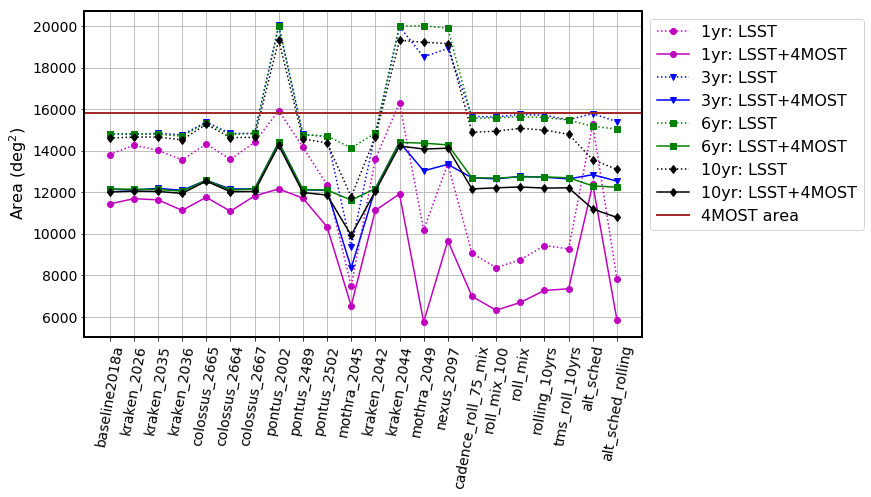

In [8]:
xlabels = []
nDbs = len(dbs)
# first need to create the lists with the data each yr_cut
plist = {}
test = {}
for dbname in dbs:  # loop over dbs
    if dbname.__contains__('_rolling_mix_10yrs'):
        label = dbname.split('_rolling_mix_10yrs')[0]
    else:
        label = dbname
    xlabels.append(label)
    for yr_cut in yrs:  # loop over yr cuts
        if yr_cut not in plist: plist[yr_cut] = []
        # add this db's area
        plist[yr_cut].append(overlaps[yr_cut][dbname])
        
        if yr_cut not in test: test[yr_cut] = []
        # add this db's area
        test[yr_cut].append(tot_area[yr_cut][dbname])
        
# now plot
for i, yr_cut in enumerate(yrs):
    plt.plot(range(nDbs), test[yr_cut], '%s:'%shapes[i], color=colors[i], label='%s: LSST'%yr_cut) 
    plt.plot(range(nDbs), plist[yr_cut], '%s-'%shapes[i], color=colors[i], label='%s: LSST+4MOST'%yr_cut) 

# plot the 4MOST area
xmin, xmax = plt.gca().get_xlim()
plt.plot([xmin, xmax], np.zeros(2)+fmost_area, '-', color=[165/255., 42/255., 42/255.], lw=2, label='4MOST area') 

# plot details
plt.grid()
plt.xlim(xmin, xmax)
plt.legend(bbox_to_anchor=(1.,1))
plt.ylabel(r'Area (deg$^2$)')
plt.xticks(range(nDbs), xlabels, rotation=80)
filename = 'compare_4MOSToverlap_%sdbs.png'%(nDbs)
plt.savefig('%s/%s'%(outDir, filename), format='png', bbox_inches='tight')
print('Saved %s'%filename)
plt.show()

**Just to check things: plot the total area calculated here from the lower-nside**

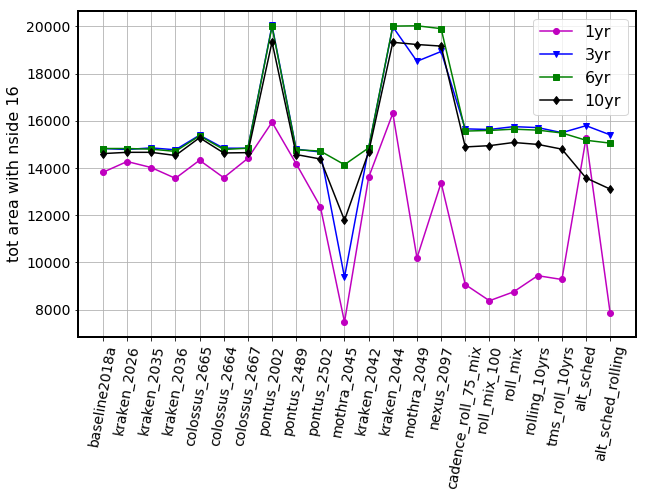

In [9]:
for i, yr_cut in enumerate(yrs):
    plt.plot(range(nDbs), test[yr_cut], '%s-'%shapes[i], color=colors[i], label=yr_cut) 
# plot details
plt.grid()
plt.legend(bbox_to_anchor=(1.,1))
plt.ylabel(r'tot area with nside %s'%nside_4most)
plt.xticks(range(nDbs), xlabels, rotation=80)
plt.show()

Okay the numbers dont look that far off from Nside 256 estimations so LSST+4MOST areas should be approximately okay.

**Print md entries for the summary table**

In [10]:
for yr_cut in plist:
    print(yr_cut)
    print('| dbname | Usable Area + 4MOST (deg2) |')
    for i, db in enumerate(xlabels):
        print('| %s | %.2f |'%(db, plist[yr_cut][i]))
    print('')

1yr
| dbname | Usable Area + 4MOST (deg2) |
| baseline2018a | 11441.25 |
| kraken_2026 | 11696.40 |
| kraken_2035 | 11642.68 |
| kraken_2036 | 11132.39 |
| colossus_2665 | 11763.54 |
| colossus_2664 | 11092.10 |
| colossus_2667 | 11830.68 |
| pontus_2002 | 12166.40 |
| pontus_2489 | 11723.25 |
| pontus_2502 | 10340.10 |
| mothra_2045 | 6539.78 |
| kraken_2042 | 11132.39 |
| kraken_2044 | 11924.68 |
| mothra_2049 | 5760.91 |
| nexus_2097 | 9668.66 |
| cadence_roll_75_mix | 6996.35 |
| roll_mix_100 | 6324.92 |
| roll_mix | 6700.92 |
| rolling_10yrs | 7278.35 |
| tms_roll_10yrs | 7358.93 |
| alt_sched | 12394.69 |
| alt_sched_rolling | 5868.34 |

3yr
| dbname | Usable Area + 4MOST (deg2) |
| baseline2018a | 12152.97 |
| kraken_2026 | 12112.69 |
| kraken_2035 | 12193.26 |
| kraken_2036 | 12099.26 |
| colossus_2665 | 12582.69 |
| colossus_2664 | 12166.40 |
| colossus_2667 | 12166.40 |
| pontus_2002 | 14408.99 |
| pontus_2489 | 12126.11 |
| pontus_2502 | 12099.26 |
| mothra_2045 | 8366.08 |
